In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [21]:
from qiskit.quantum_info import entropy

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_22128\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-04-27 13:14:49,086: Credentials are already in use. The existing account in the session will be replaced.


ibm_oslo                     ibm_perth                    ibm_nairobi
--------                     ---------                    -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 20             Pending Jobs: 585            Pending Jobs: 31
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      118.5          Avg. T1:      181.6          Avg. T1:      114.3
Avg. T2:      102.5          Avg. T2:      116.3          Avg. T2:      60.8



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 97             Pending Jobs: 39             Pending Jobs: 202
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

In [7]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); dth = th.shape[0]
rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
Irr_b_in                 = np.zeros(th.shape[0])
Irr_b_out                = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

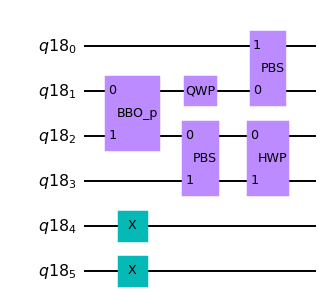

In [8]:
def qc_QCR(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCR_ = qc_QCR(math.pi); qc_QCR_.draw(output = 'mpl', scale = 0.7)

In [9]:
for j in range(0,dth):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCR_ = qc_QCR(th[j]); qc.append(qc_QCR_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01
j =  1  - theta = 0.16657963267948966
j =  2  - theta = 0.3231592653589793
j =  3  - theta = 0.479738898038469
j =  4  - theta = 0.6363185307179586
j =  5  - theta = 0.7928981633974483
j =  6  - theta = 0.9494777960769379
j =  7  - theta = 1.1060574287564275
j =  8  - theta = 1.2626370614359173
j =  9  - theta = 1.419216694115407
j = 10  - theta = 1.5757963267948967
j = 11  - theta = 1.7323759594743862
j = 12  - theta = 1.8889555921538759
j = 13  - theta = 2.0455352248333654
j = 14  - theta = 2.202114857512855
j = 15  - theta = 2.358694490192345
j = 16  - theta = 2.5152741228718343
j = 17  - theta = 2.6718537555513238
j = 18  - theta = 2.8284333882308137
j = 19  - theta = 2.985013020910303
j = 20  - theta = 3.141592653589793


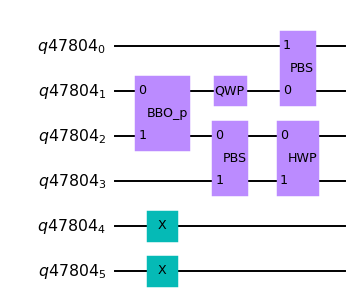

In [10]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

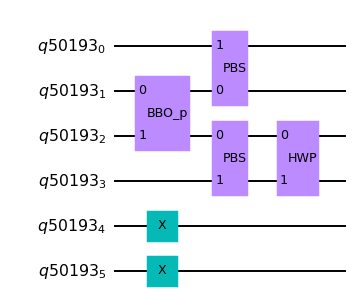

In [11]:
def qc_QCR(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCR_ = qc_QCR(math.pi); qc_QCR_.draw(output = 'mpl', scale = 0.7)

In [12]:
for j in range(0,dth):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCR_ = qc_QCR(th[j]); qc.append(qc_QCR_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01
j =  1  - theta = 0.16657963267948966
j =  2  - theta = 0.3231592653589793
j =  3  - theta = 0.479738898038469
j =  4  - theta = 0.6363185307179586
j =  5  - theta = 0.7928981633974483
j =  6  - theta = 0.9494777960769379
j =  7  - theta = 1.1060574287564275
j =  8  - theta = 1.2626370614359173
j =  9  - theta = 1.419216694115407
j = 10  - theta = 1.5757963267948967
j = 11  - theta = 1.7323759594743862
j = 12  - theta = 1.8889555921538759
j = 13  - theta = 2.0455352248333654
j = 14  - theta = 2.202114857512855
j = 15  - theta = 2.358694490192345
j = 16  - theta = 2.5152741228718343
j = 17  - theta = 2.6718537555513238
j = 18  - theta = 2.8284333882308137
j = 19  - theta = 2.985013020910303
j = 20  - theta = 3.141592653589793


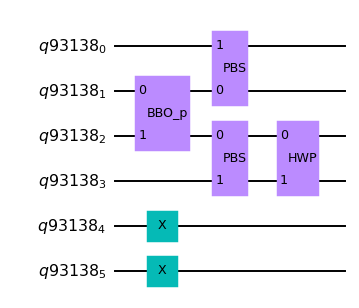

In [13]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

### Cálculos

#### QWP$_{in}$

In [61]:
for j in range(0,dth):
    rhob_0bWZ_in[j] = projM_np(8, '0', rhob_AbWZ_in[j])
    Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(rhob_0bWZ_in[j])
    Irr_b_in[j] = entropy(Phi_b_0bWZ_in[j]) - entropy(rhob_0bWZ_in[j])
    print(Irr_b_in[j])

0.006600219804296717
0.06206627996722443
0.16487331630890648
0.30098278627328534
0.4564458470088391
0.5997969155607393
0.7257476001908045
0.8332373436393548
0.9161813257287903
0.9590346469623701
0.9770392529753842
0.9649654764243029
0.9143860539313522
0.8331936850259378
0.7210666620625867
0.5836320771604413
0.44640433945340724
0.29625781430438125
0.16125858420449143
0.05316559676689549
0.003961632984368427


#### QWP$_{out}$

In [64]:
for j in range(0,dth):
    rhob_0bWZ_out[j] = projM_np(8, '0', rhob_AbWZ_out[j])
    Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(rhob_0bWZ_out[j])
    Irr_b_out[j] = entropy(Phi_b_0bWZ_out[j]) - entropy(rhob_0bWZ_out[j])
    print(Irr_b_out[j])

0.0024129140651896995
0.0020246238248863013
0.00400992099755252
0.003366859715424636
0.0033772262442275866
0.0036686420266703462
0.00543887736310561
0.005268453183287211
0.006172848462810909
0.004152484914776315
0.009214852358658501
0.00758161908506598
0.007938241357738185
0.008316008535772954
0.010406576816554713
0.007864800878417386
0.019599192498108403
0.027484750617368492
0.05107986358574623
0.10882218948716726
0.5002092955974647


<Figure size 500x400 with 0 Axes>

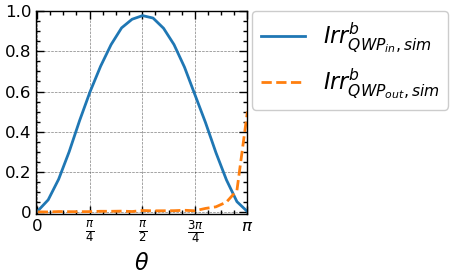

In [65]:
import string
plt.figure(figsize = (5,4), constrained_layout = True)
plt.subplots(figsize=(7, 3))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th, Irr_b_in, '-' , color='#1f77b4', label = r'$Irr_{QWP_{in}, sim}^{b}$')
plt.plot(th, Irr_b_out, '--', color='#ff7f0e', label = r'$Irr_{QWP_{out},sim}^{b}$')
#
#
#
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]#, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']#, r'$\frac{5\pi}{4}$',  r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()